# 이미지 데이터 셋을 이용한 CNN Modeling
## Animals Dataset Categorical Classification
* Train_Data : 5000
* Valid_Data : 3000
* Test_Data : 3000

In [1]:
import warnings
warnings.filterwarnings('ignore')

* Import TensorFlow

In [2]:
import tensorflow as tf

tf.__version__

'2.9.2'

# I. wget From Github

> ## 1) 'animals_part.zip' 파일 다운로드

In [3]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.zip

--2022-11-08 04:33:51--  https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88551715 (84M) [application/zip]
Saving to: ‘animals_part.zip’

animals_part.zip    100%[===================>]  84.45M   223MB/s    in 0.4s    

2022-11-08 04:33:52 (223 MB/s) - ‘animals_part.zip’ saved [88551715/88551715]



In [4]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.z01

--2022-11-08 04:33:52--  https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.z01
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94371840 (90M) [application/octet-stream]
Saving to: ‘animals_part.z01’

animals_part.z01    100%[===================>]  90.00M   254MB/s    in 0.4s    

2022-11-08 04:33:52 (254 MB/s) - ‘animals_part.z01’ saved [94371840/94371840]



In [5]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.z02

--2022-11-08 04:33:53--  https://raw.githubusercontent.com/rusita-ai/pyData/master/animals_part.z02
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94371840 (90M) [application/octet-stream]
Saving to: ‘animals_part.z02’

animals_part.z02    100%[===================>]  90.00M   278MB/s    in 0.3s    

2022-11-08 04:33:53 (278 MB/s) - ‘animals_part.z02’ saved [94371840/94371840]



* 다운로드 결과 확인

In [6]:
!ls -l

total 270808
-rw-r--r-- 1 root root 94371840 Nov  8 04:33 animals_part.z01
-rw-r--r-- 1 root root 94371840 Nov  8 04:33 animals_part.z02
-rw-r--r-- 1 root root 88551715 Nov  8 04:33 animals_part.zip
drwxr-xr-x 1 root root     4096 Oct 28 13:37 sample_data


> ## 2) 분할된 파일 합치기

In [7]:
!zip -Fq animals_part.zip --out animals.zip

* 'animals.zip' 생성 확인

In [8]:
!ls -l

total 541608
-rw-r--r-- 1 root root  94371840 Nov  8 04:33 animals_part.z01
-rw-r--r-- 1 root root  94371840 Nov  8 04:33 animals_part.z02
-rw-r--r-- 1 root root  88551715 Nov  8 04:33 animals_part.zip
-rw-r--r-- 1 root root 277295391 Nov  8 04:33 animals.zip
drwxr-xr-x 1 root root      4096 Oct 28 13:37 sample_data


# II. Data Preprocessing

> ## 1) Unzip 'animals.zip'

In [9]:
!unzip -q /content/animals.zip

* 학습 데이터 확인

In [10]:
!ls -l animals/

total 12
drwxr-xr-x 12 root root 4096 Oct 25 13:50 test
drwxr-xr-x 12 root root 4096 Oct 25 13:50 train
drwxr-xr-x 12 root root 4096 Oct 25 13:50 validation


> ## 2) Image_File Directory Setting

* train_dir
* valid_dir
* test_dir

In [11]:
train_dir = 'animals/train'
valid_dir = 'animals/validation'
test_dir  = 'animals/test'

> ## 3) ImageDataGenerator( ) & flow_from_directory( )

* Normalization
 * ImageDataGenerator( )
* Resizing & Generator
 * flow_from_directory( )

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip=True,
                                   vertical_flip = True,
                                   fill_mode = 'nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'categorical')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'categorical')

Found 5000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


> ## 4) Test train_generator

In [13]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20, 10)


In [14]:
labels_batch

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

# III. CNN Keras Modeling

> ## 1) Model Define

* Feature Extraction & Classification

In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

> ## 2) Model Compile

* 모델 학습방법 설정

In [17]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 25분

In [18]:
%%time

Hist_animal = model.fit(train_generator,
                        steps_per_epoch = 250,
                        epochs = 30,
                        validation_data = valid_generator,
                        validation_steps = 150)

Epoch 1/30
250/250 [==============================] - 51s 170ms/step - loss: 2.2671 - accuracy: 0.1476 - val_loss: 2.2022 - val_accuracy: 0.1803
Epoch 2/30
250/250 [==============================] - 47s 188ms/step - loss: 2.1759 - accuracy: 0.1882 - val_loss: 2.2517 - val_accuracy: 0.2017
Epoch 3/30
250/250 [==============================] - 42s 167ms/step - loss: 2.0886 - accuracy: 0.2248 - val_loss: 2.1405 - val_accuracy: 0.2430
Epoch 4/30
250/250 [==============================] - 42s 170ms/step - loss: 2.0339 - accuracy: 0.2532 - val_loss: 1.9359 - val_accuracy: 0.2957
Epoch 5/30
250/250 [==============================] - 42s 168ms/step - loss: 1.9201 - accuracy: 0.3086 - val_loss: 2.0527 - val_accuracy: 0.2990
Epoch 6/30
250/250 [==============================] - 42s 167ms/step - loss: 1.8514 - accuracy: 0.3292 - val_loss: 1.8446 - val_accuracy: 0.3387
Epoch 7/30
250/250 [==============================] - 42s 170ms/step - loss: 1.7746 - accuracy: 0.3570 - val_loss: 2.0381 - val_ac

> ## 4) 학습 결과 시각화

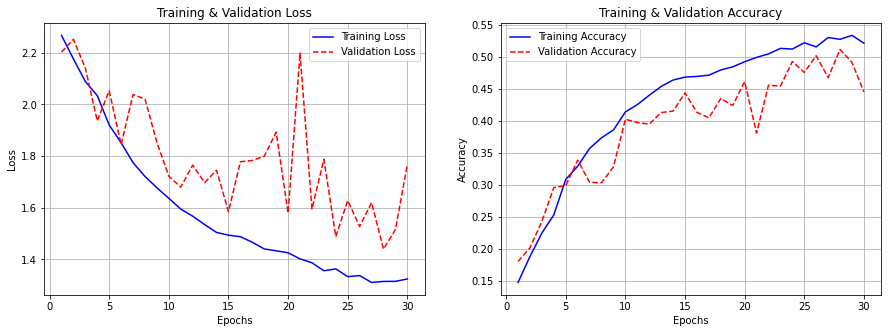

In [19]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_animal.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_animal.history['loss'], 'b-')
plt.plot(epochs, Hist_animal.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_animal.history['accuracy'], 'b-')
plt.plot(epochs, Hist_animal.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* test_generator

In [20]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'categorical')

Found 3000 images belonging to 10 classes.


* Loss & Accuracy

In [21]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 150)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

150/150 [==============================] - 6s 37ms/step - loss: 1.6877 - accuracy: 0.4353
Loss = 1.68771
Accuracy = 0.43533


# 
# 
# 
# The End
# 
# 
# 